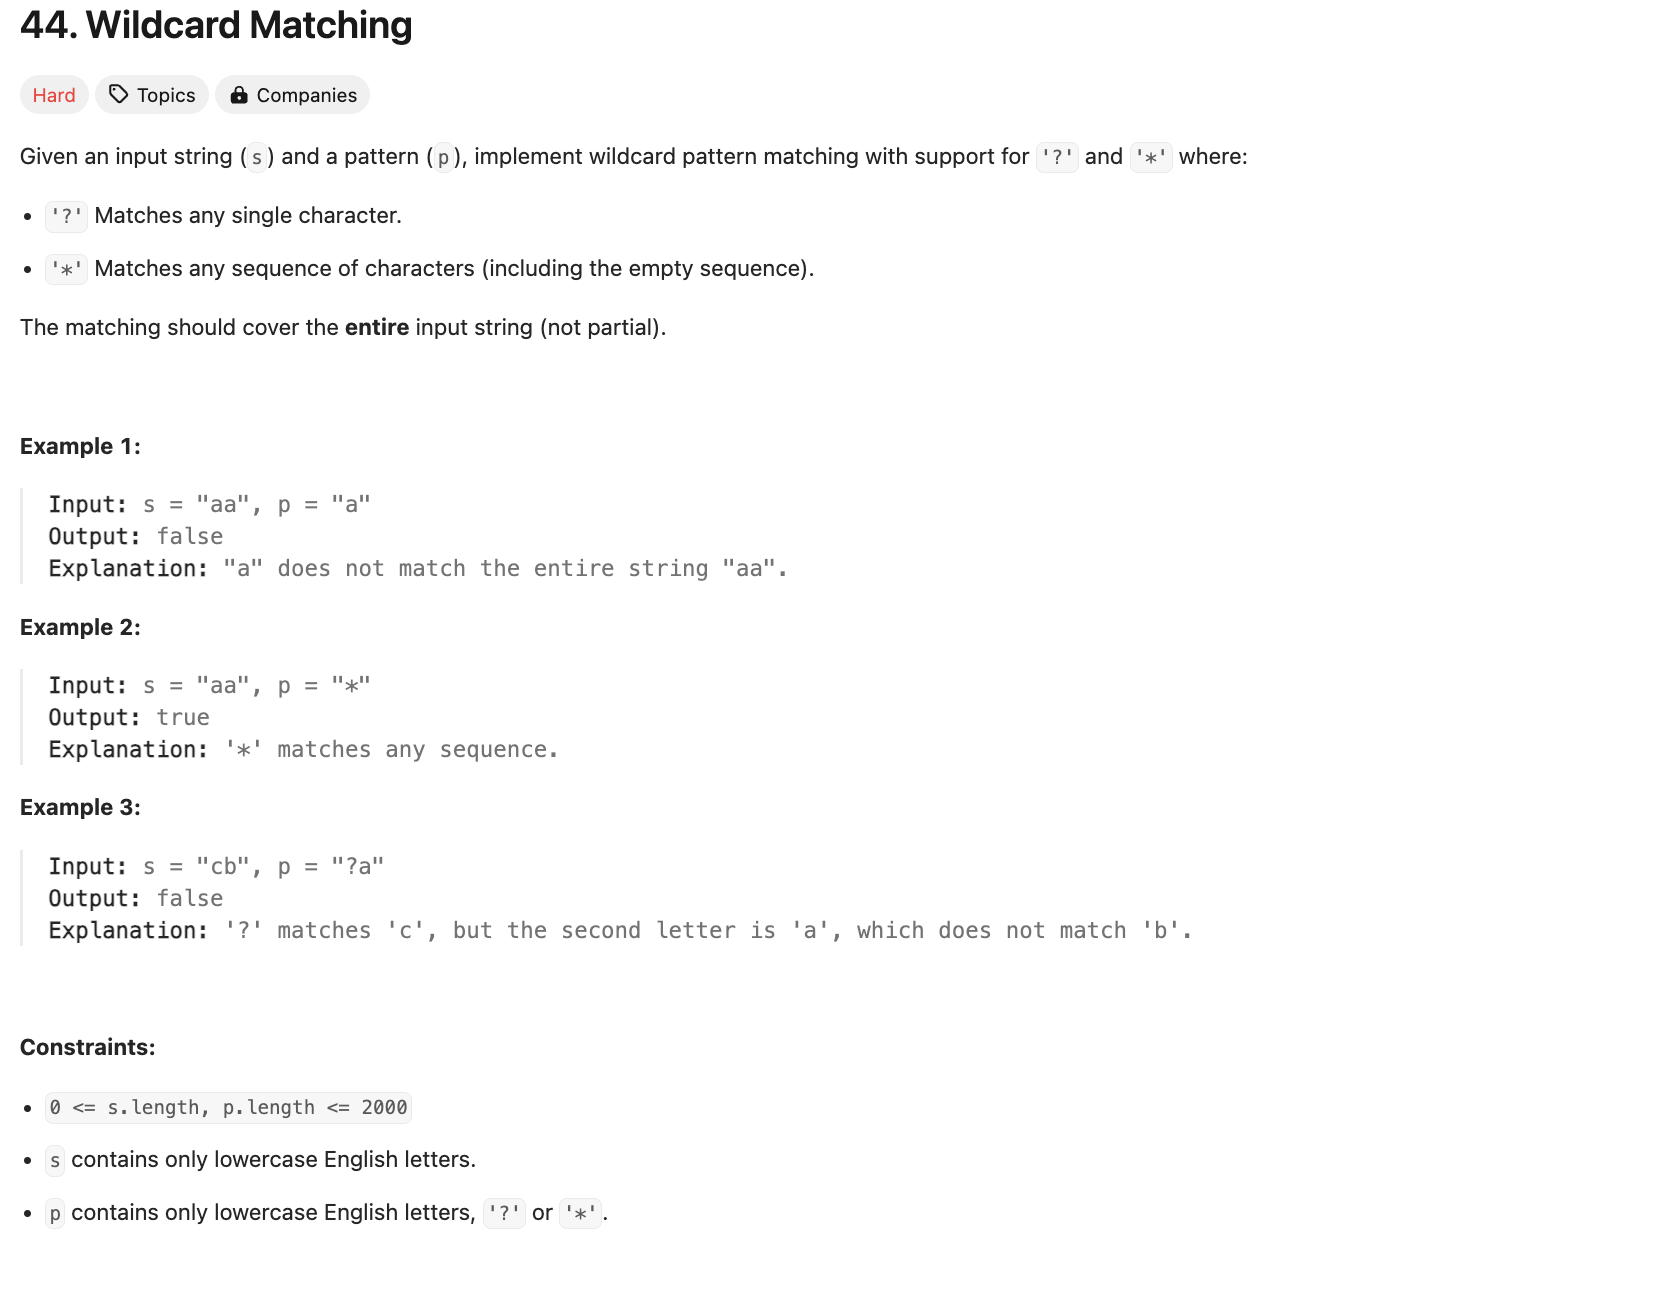

In [1]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        """
        Determines if the string `s` matches the pattern `p`.
        - `?` matches any single character.
        - `*` matches any sequence of characters (including the empty sequence).

        Args:
        s: The input string.
        p: The pattern string.

        Returns:
        True if `s` matches `p`, otherwise False.
        """

        # Initialize dimensions of DP table.
        m, n = len(s), len(p)

        # Create a DP table of size (m + 1) x (n + 1).
        dp = [[False] * (n + 1) for _ in range(m + 1)]

        # Base case: An empty string matches an empty pattern.
        dp[0][0] = True

        # Fill the first row (empty string case).
        # A pattern can only match an empty string if it consists of '*' characters.
        for j in range(1, n + 1):
            dp[0][j] = dp[0][j - 1] and p[j - 1] == '*'

        # Fill the DP table row by row.
        for i in range(1, m + 1):  # Iterate through the string `s`.
            for j in range(1, n + 1):  # Iterate through the pattern `p`.

                if p[j - 1] == '*':
                    # '*' can match zero characters (dp[i][j-1]) or one/more characters (dp[i-1][j]).
                    dp[i][j] = dp[i][j - 1] or dp[i - 1][j]
                elif p[j - 1] == '?' or s[i - 1] == p[j - 1]:
                    # If the current pattern character is '?' or matches the current string character.
                    dp[i][j] = dp[i - 1][j - 1]

        # The final result is stored in dp[m][n], indicating whether the full `s` matches `p`.
        return dp[m][n]


In [2]:
Solution().isMatch("abcd","a*d")

True

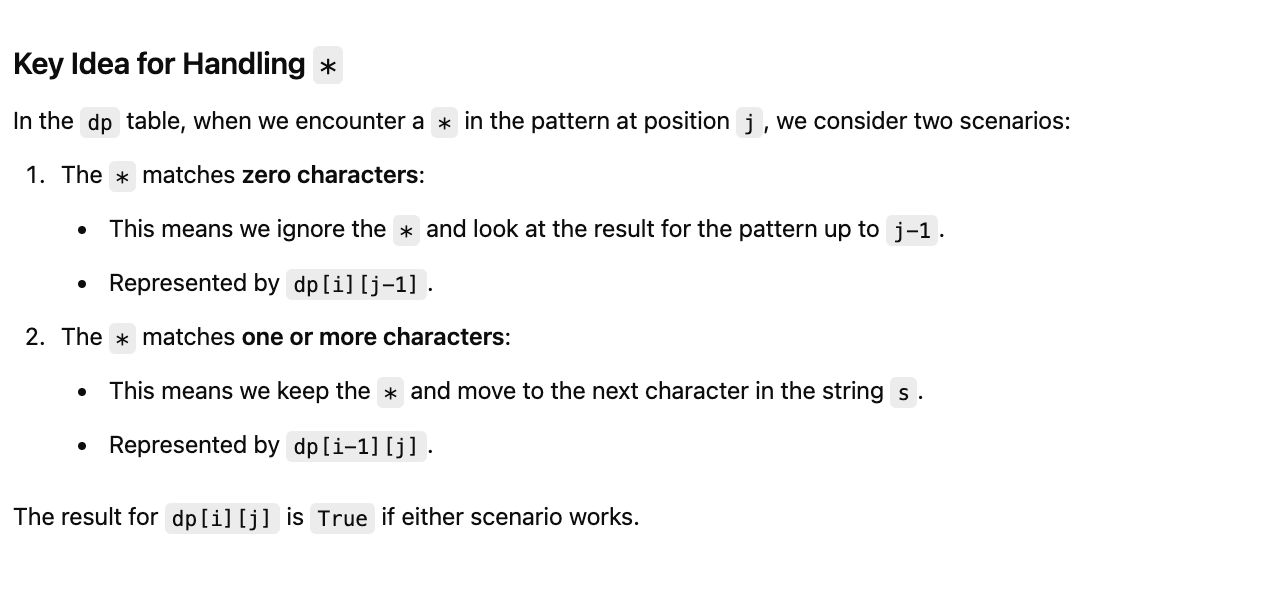

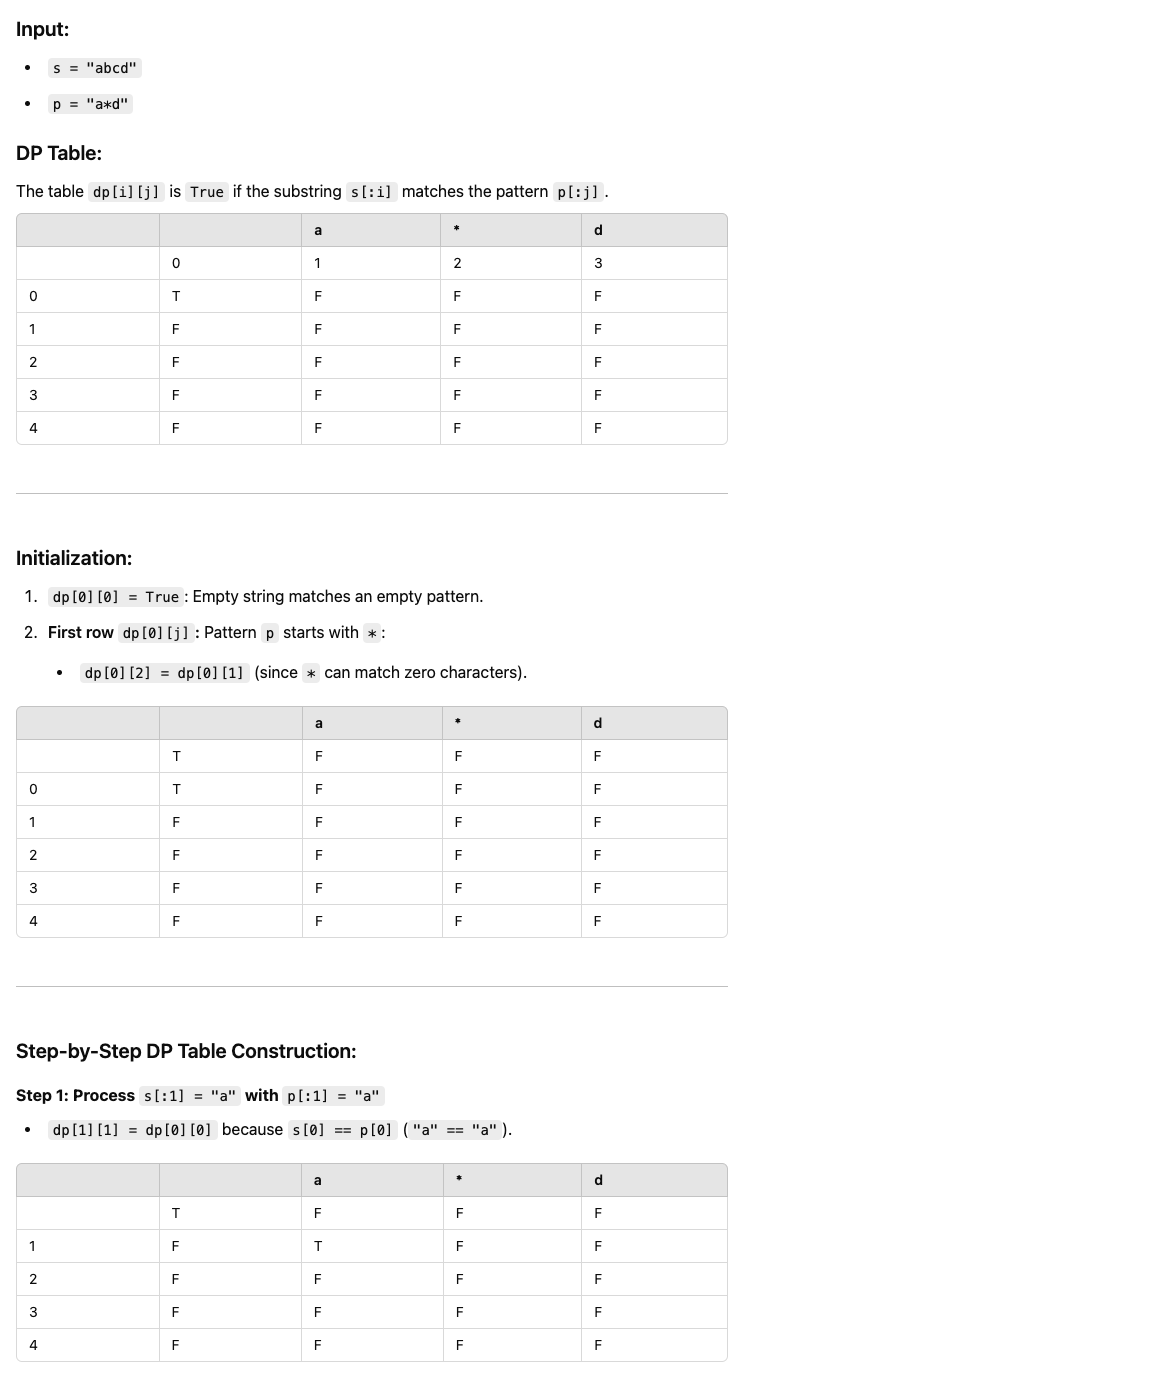

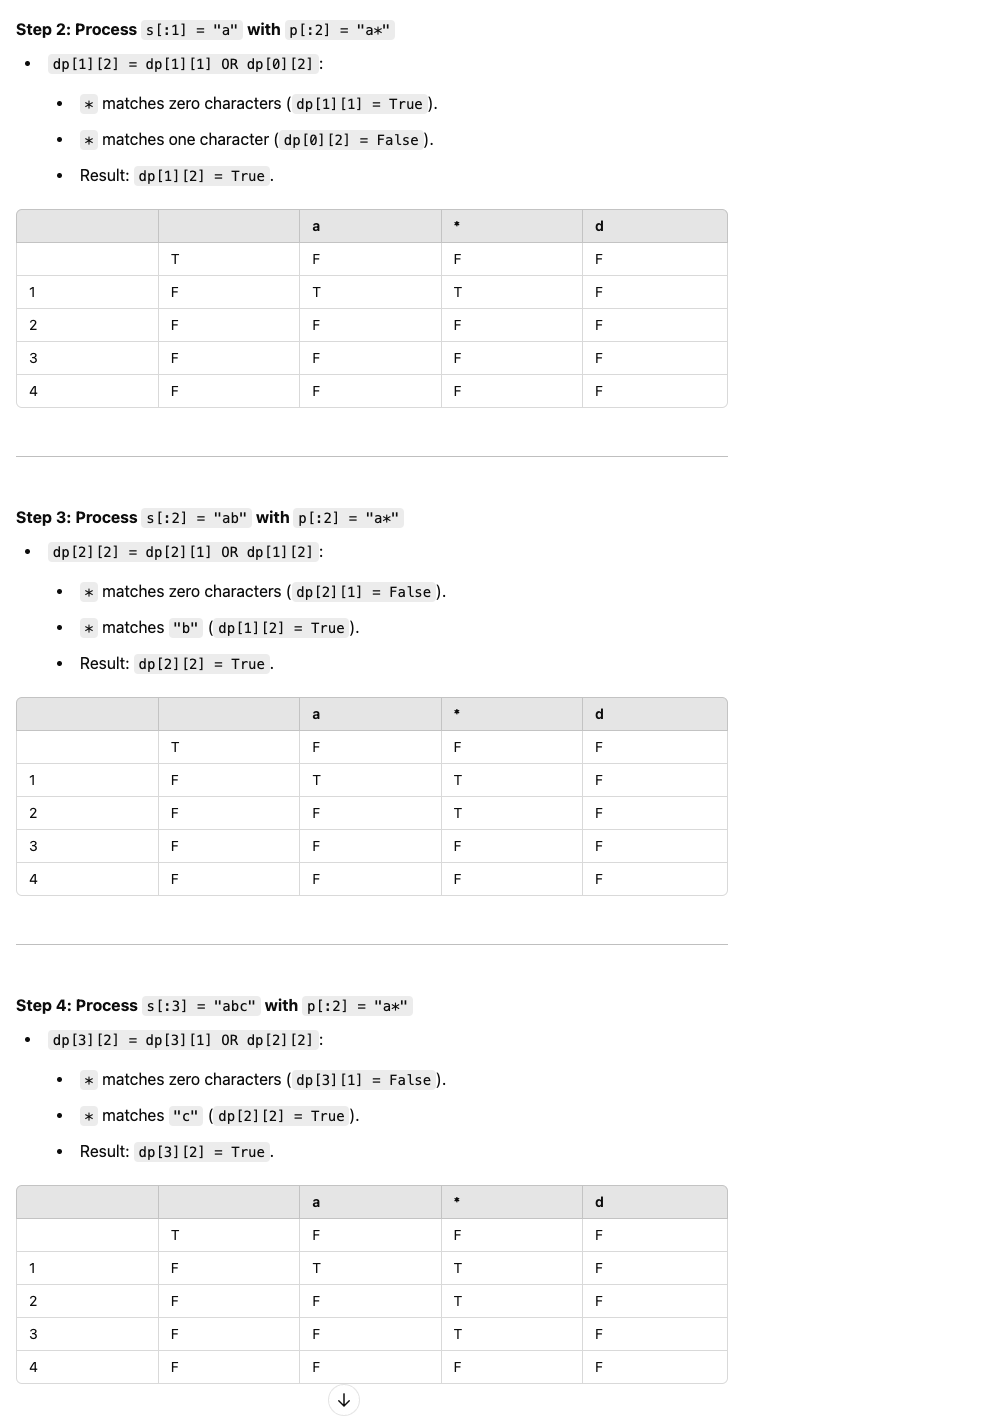

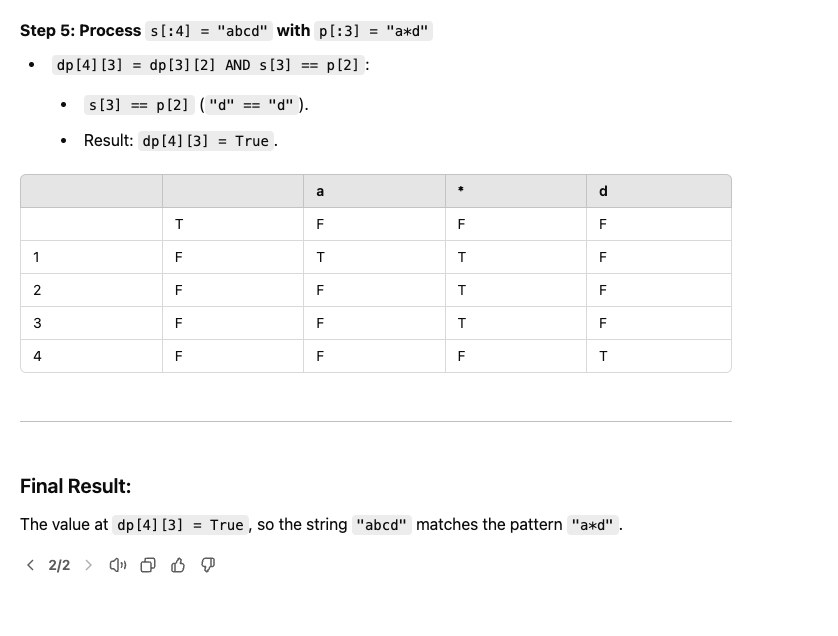

************************************************************************************************************************************************************************************************************

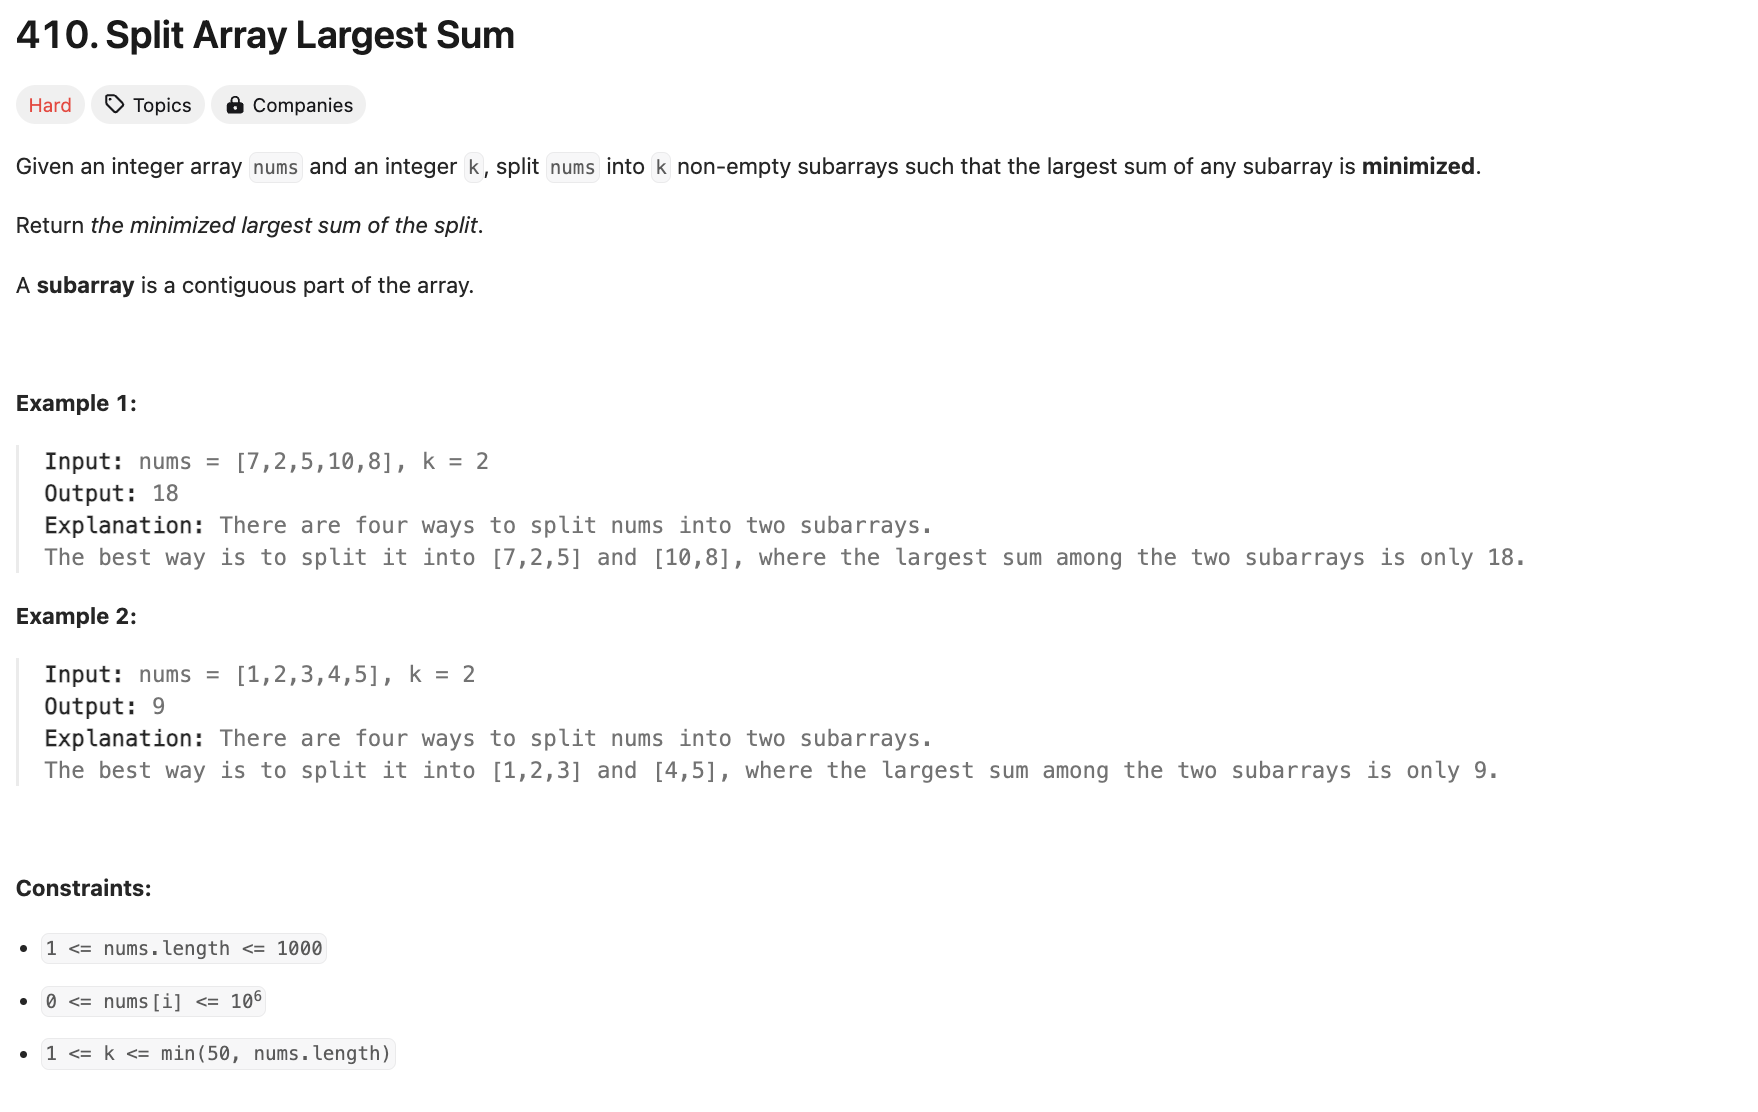

In [4]:
from typing import List
from bisect import bisect_left
from math import inf
class Solution:
    def splitArray(self, nums: List[int], k: int) -> int:

        def can_split(mid):
            # Check if we can split nums into <= k subarrays with largest sum <= mid
            subarray_count = 1
            current_sum = 0
            for num in nums:
                if current_sum + num > mid:
                    subarray_count += 1
                    current_sum = num
                    if subarray_count > k:
                        return False
                else:
                    current_sum += num
            return True

        # Set initial bounds for binary search
        # left is the maximum value (since we cannot have a smaller sum than a single element)
        # right is the sum of all the numbers (if we put all nums in one subarray)
        left, right = max(nums), sum(nums)

        # Perform a binary search to find the smallest feasible maximum sum
        # We use bisect_left to find the first value in range(left, right+1)
        # such that is_feasible returns True
        smallest_max_sum = left + bisect_left(range(left, right + 1), True, key=can_split)

        # Return the smallest feasible maximum sum for splitting nums into k or fewer subarrays
        return smallest_max_sum
        

In [6]:
Solution().splitArray([7, 2, 5, 10, 8],2)

18

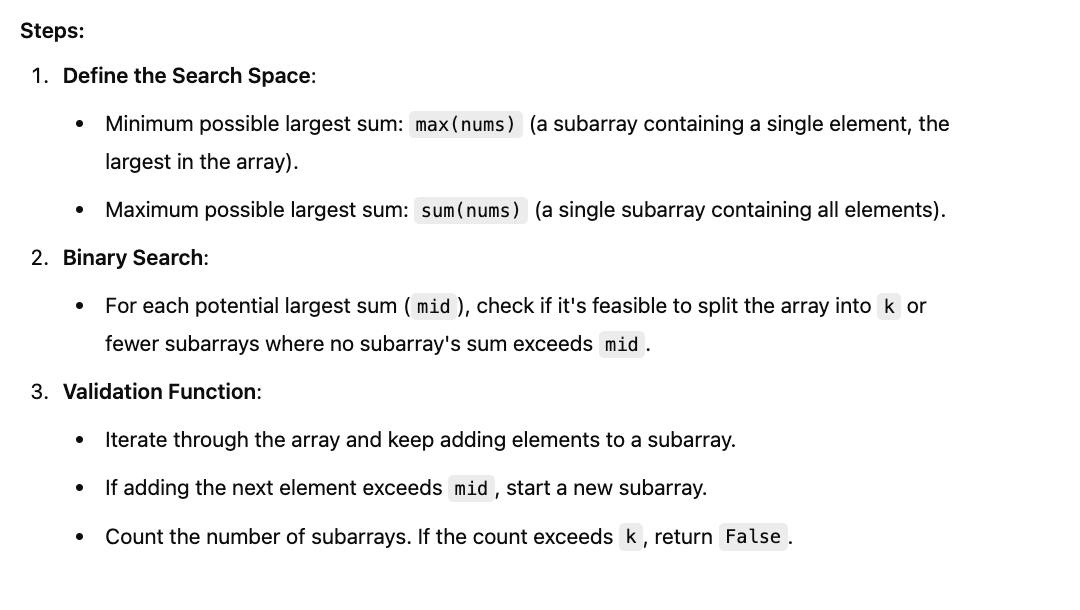

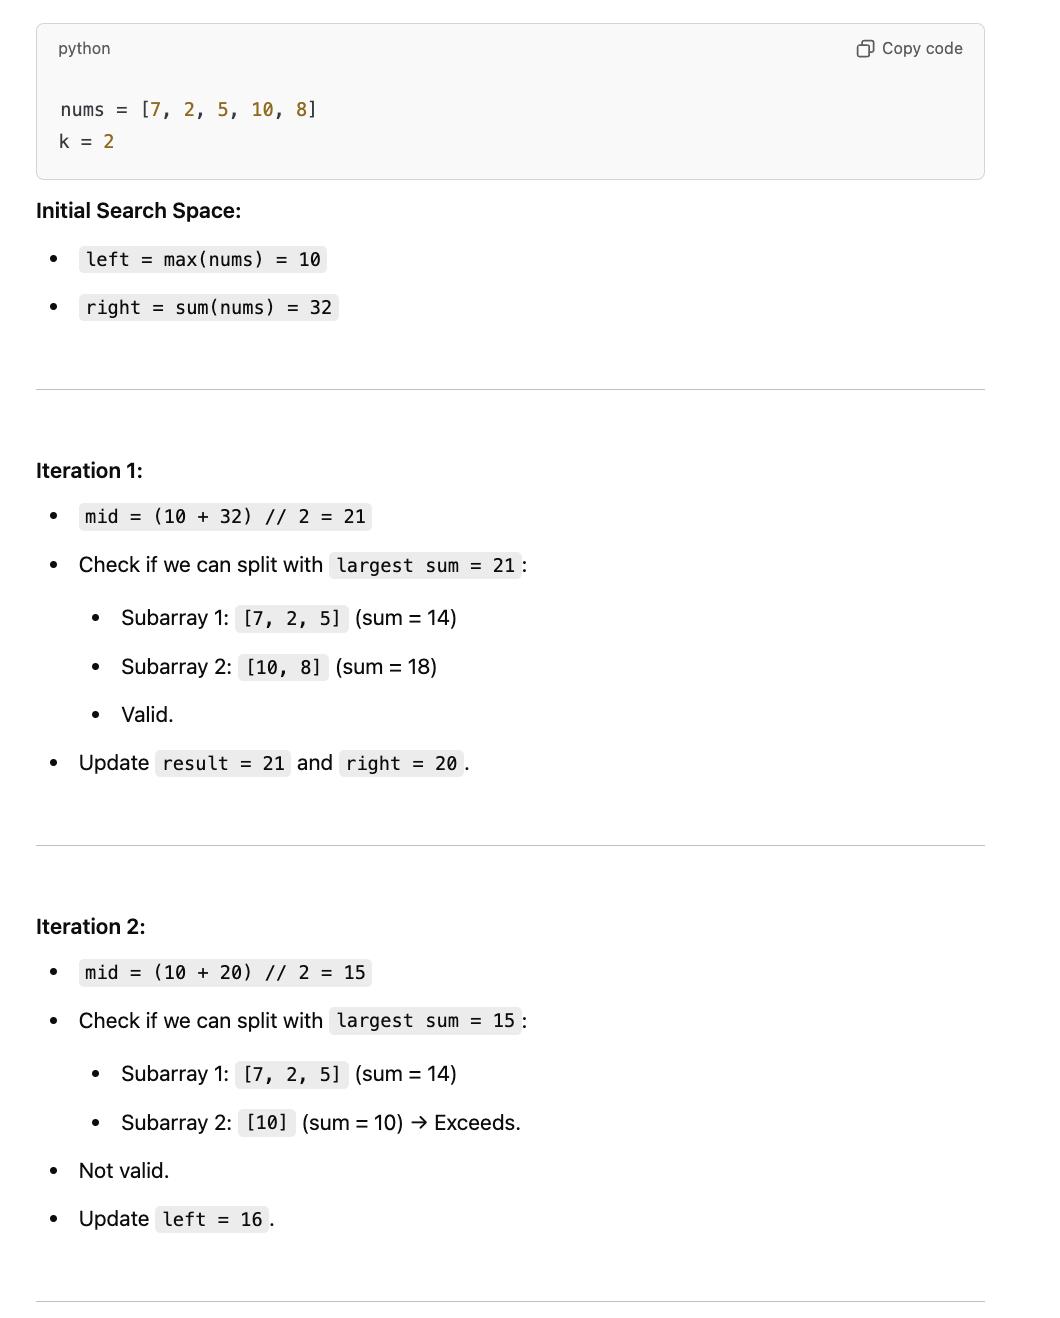

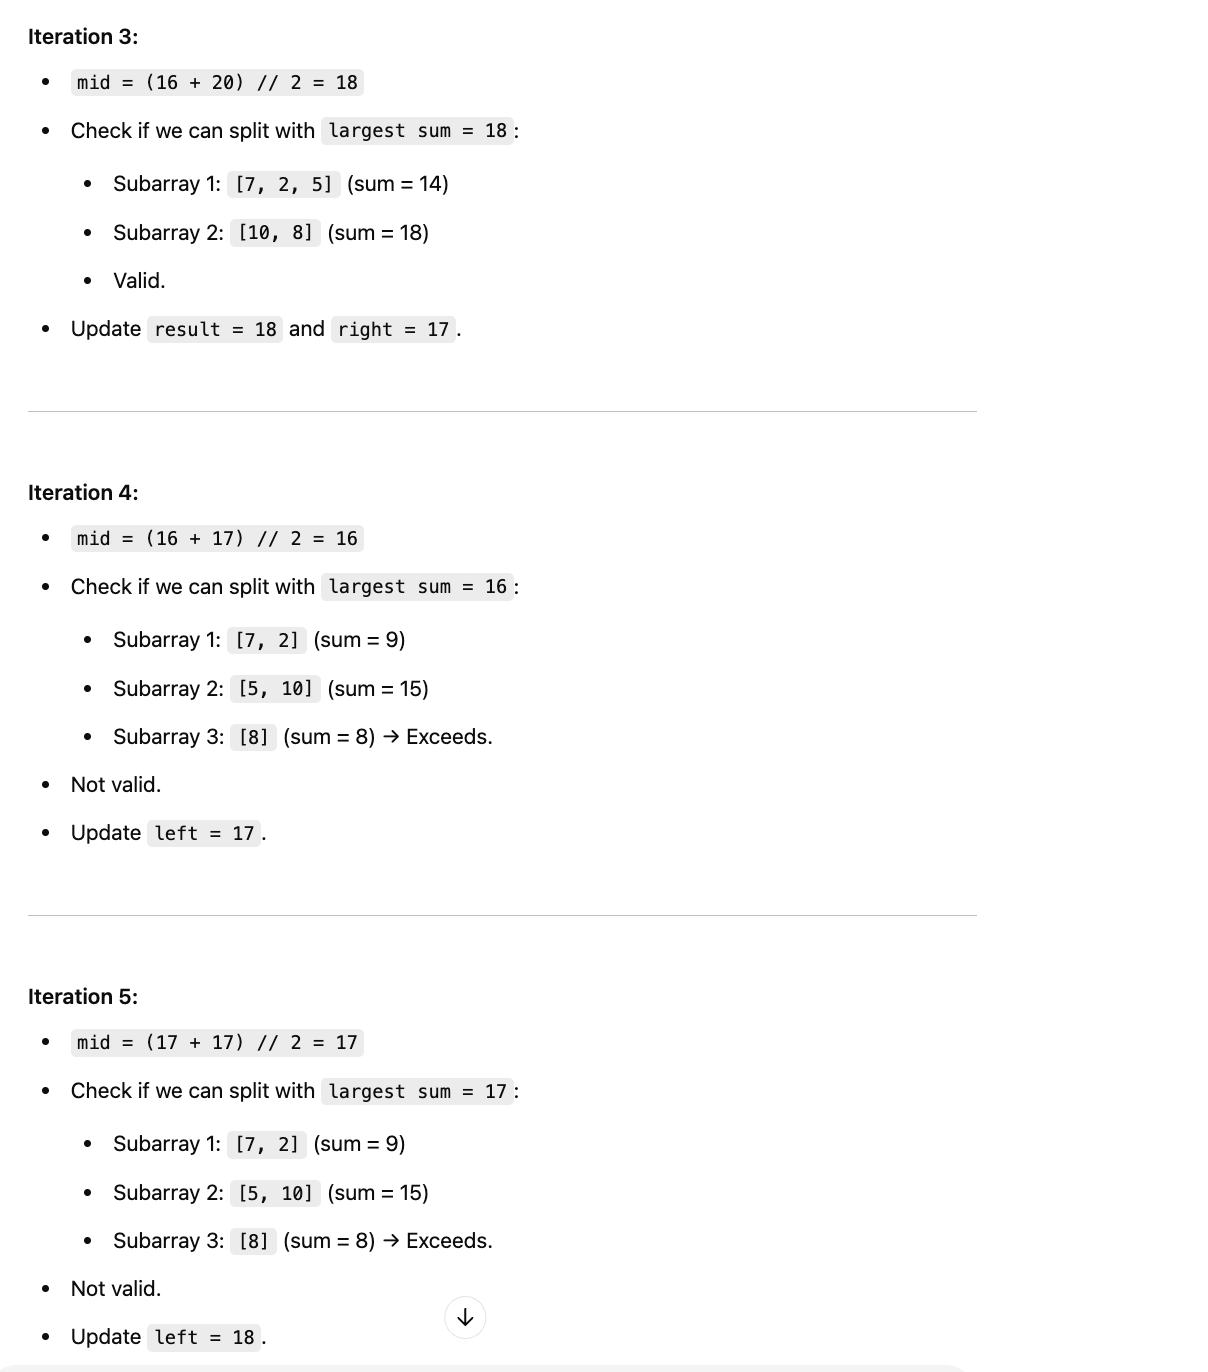

Result:

Final result = 18.

In [7]:
class Solution:
    def splitArray(self, nums: List[int], k: int) -> int:
        def can_split(mid):
            # Check if we can split nums into <= k subarrays with largest sum <= mid
            subarray_count = 1
            current_sum = 0
            for num in nums:
                if current_sum + num > mid:
                    subarray_count += 1
                    current_sum = num
                    if subarray_count > k:
                        return False
                else:
                    current_sum += num
            return True
        
        # Define the search space
        left, right = max(nums), sum(nums)
        result = right
        
        while left <= right:
            mid = (left + right) // 2
            if can_split(mid):
                result = mid  # Update result, try for smaller largest sum
                right = mid - 1
            else:
                left = mid + 1
        
        return result


In [8]:
Solution().splitArray([7, 2, 5, 10, 8],2)

18

************************************************************************************************************************************************************************************************************

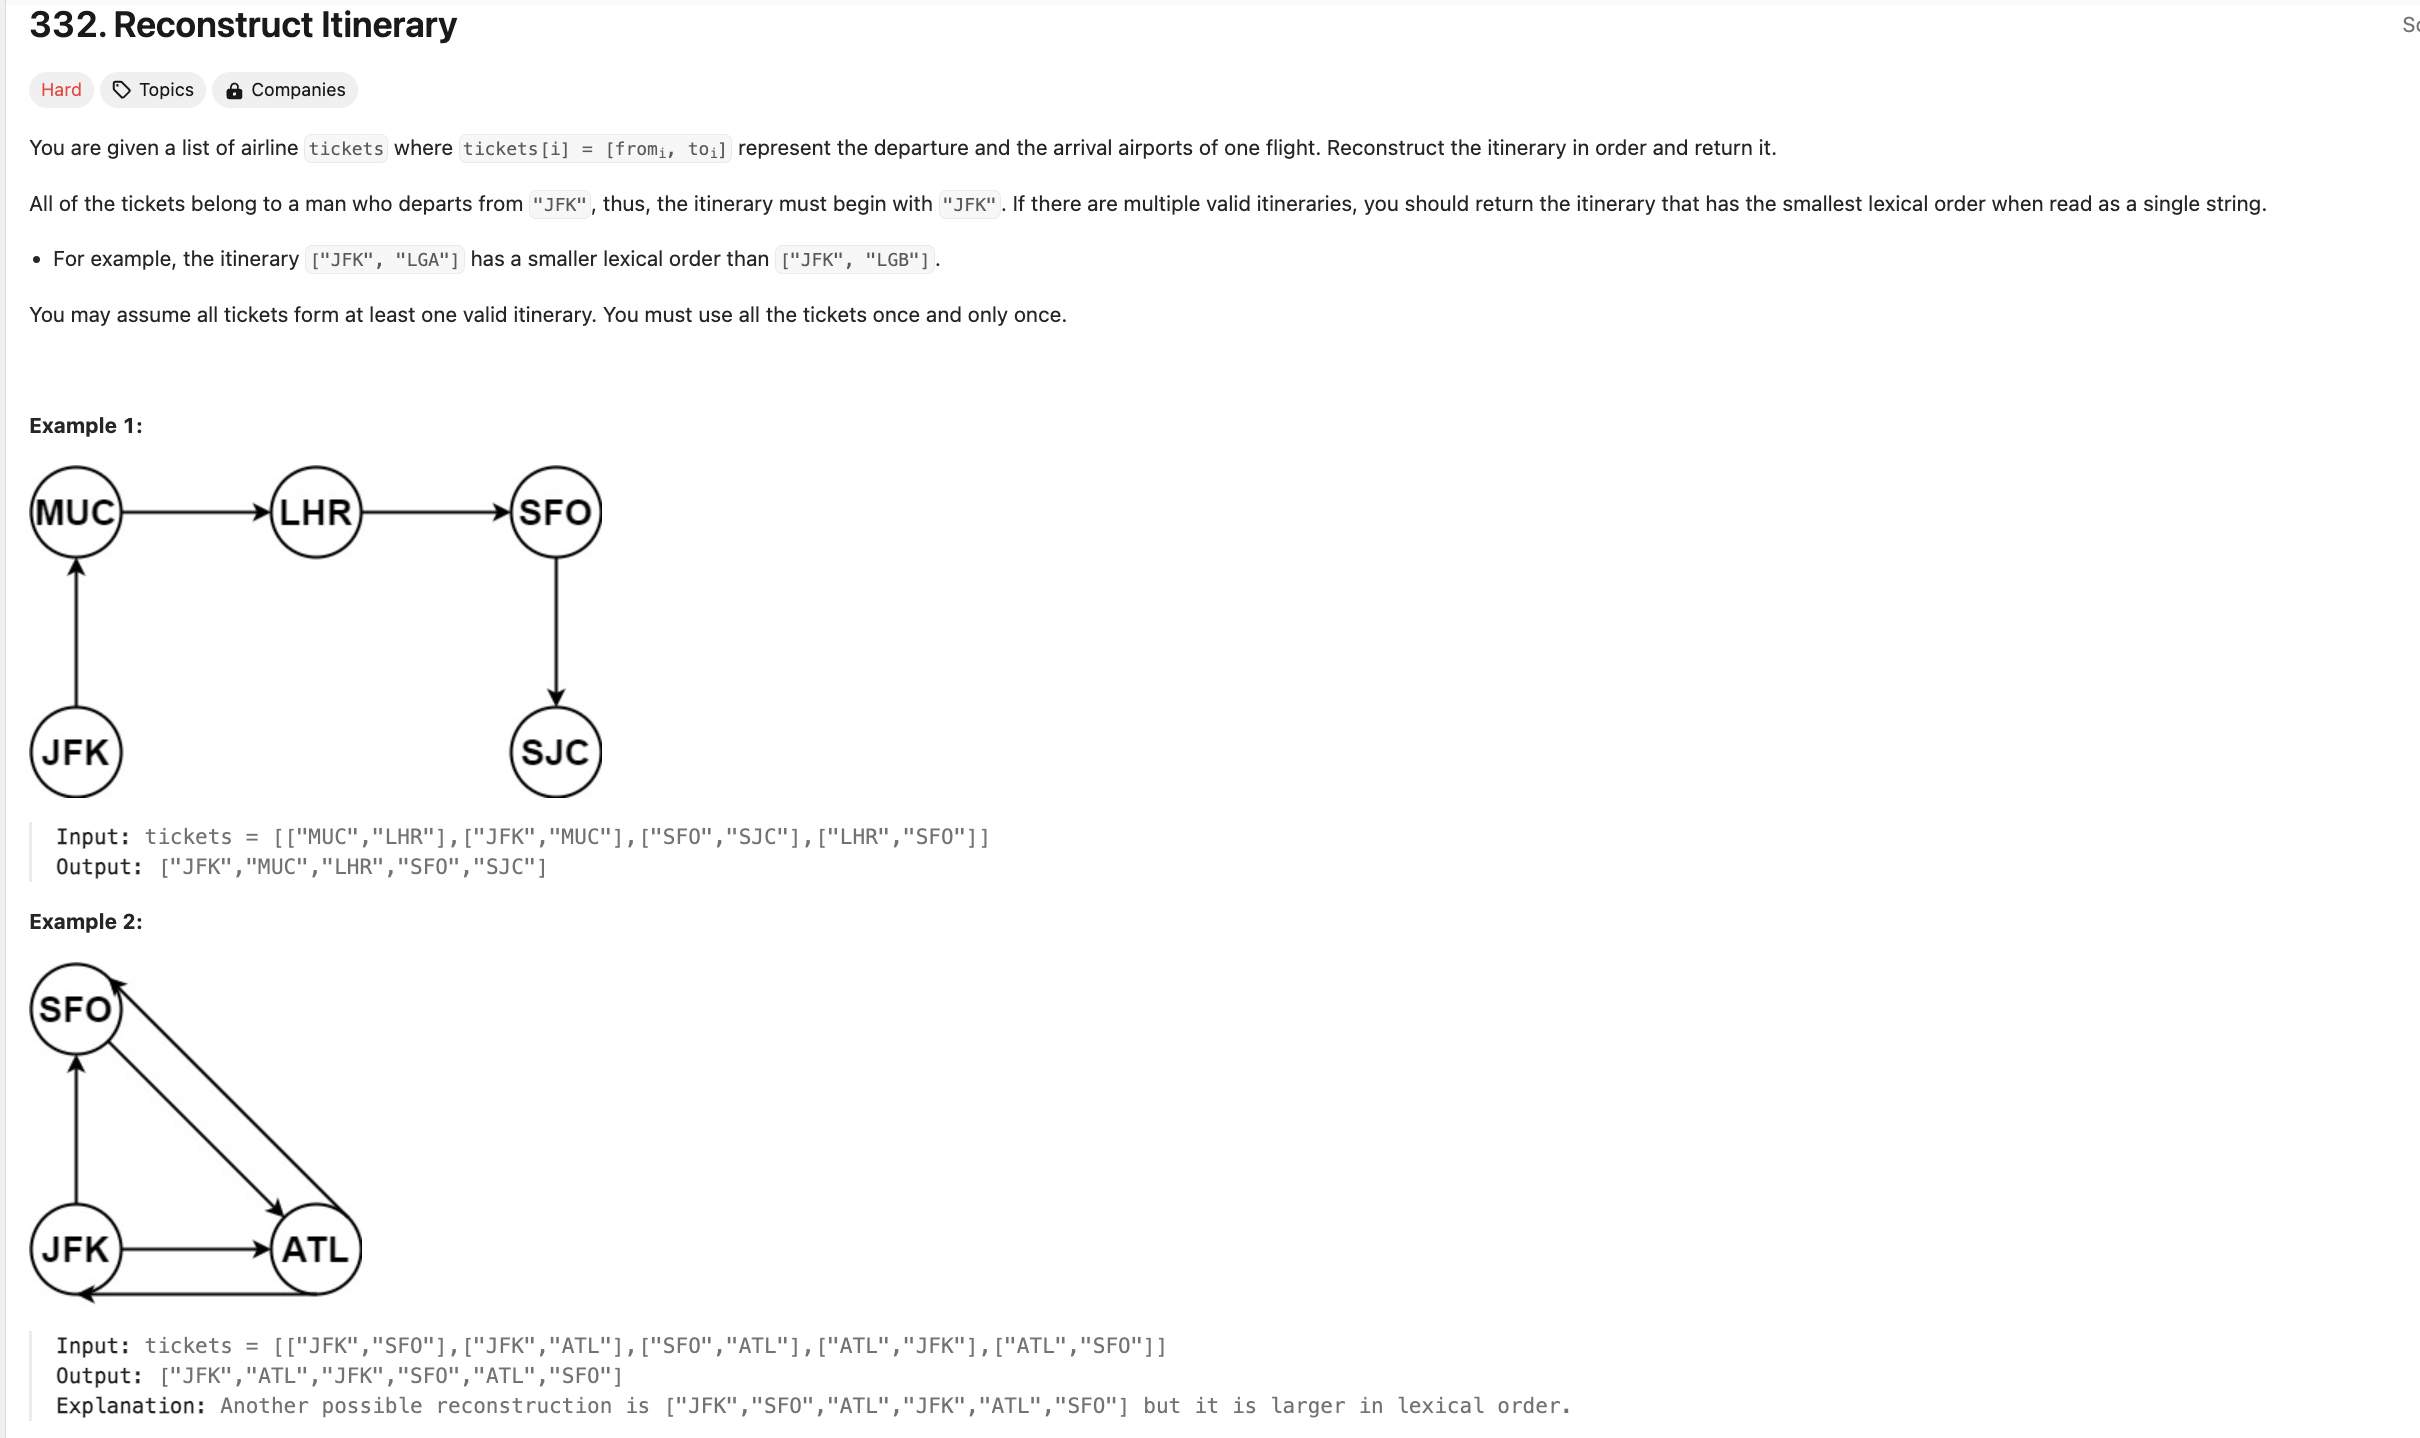

In [2]:
from collections import defaultdict, deque
from typing import List
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        # Step 1: Build the graph
        graph = defaultdict(deque)
        
        # Sort tickets to ensure lexicographical order and populate the graph
        for from_airport, to_airport in sorted(tickets):
            graph[from_airport].append(to_airport)
        
        itinerary = []
        
        # Step 2: Perform DFS
        def dfs(airport):
            while graph[airport]:
                next_airport = graph[airport].popleft()  # Get the next destination
                dfs(next_airport)
            itinerary.append(airport)  # Append to itinerary during backtracking
        
        # Start DFS from "JFK"
        dfs("JFK")
        
        # Step 3: Reverse the itinerary to get the correct order
        return itinerary[::-1]


In [4]:
tickets = [["JFK", "SFO"], ["JFK", "ATL"], ["SFO", "ATL"], 
           ["ATL", "JFK"], ["ATL", "SFO"]]

Solution().findItinerary(tickets)

['JFK', 'ATL', 'JFK', 'SFO', 'ATL', 'SFO']

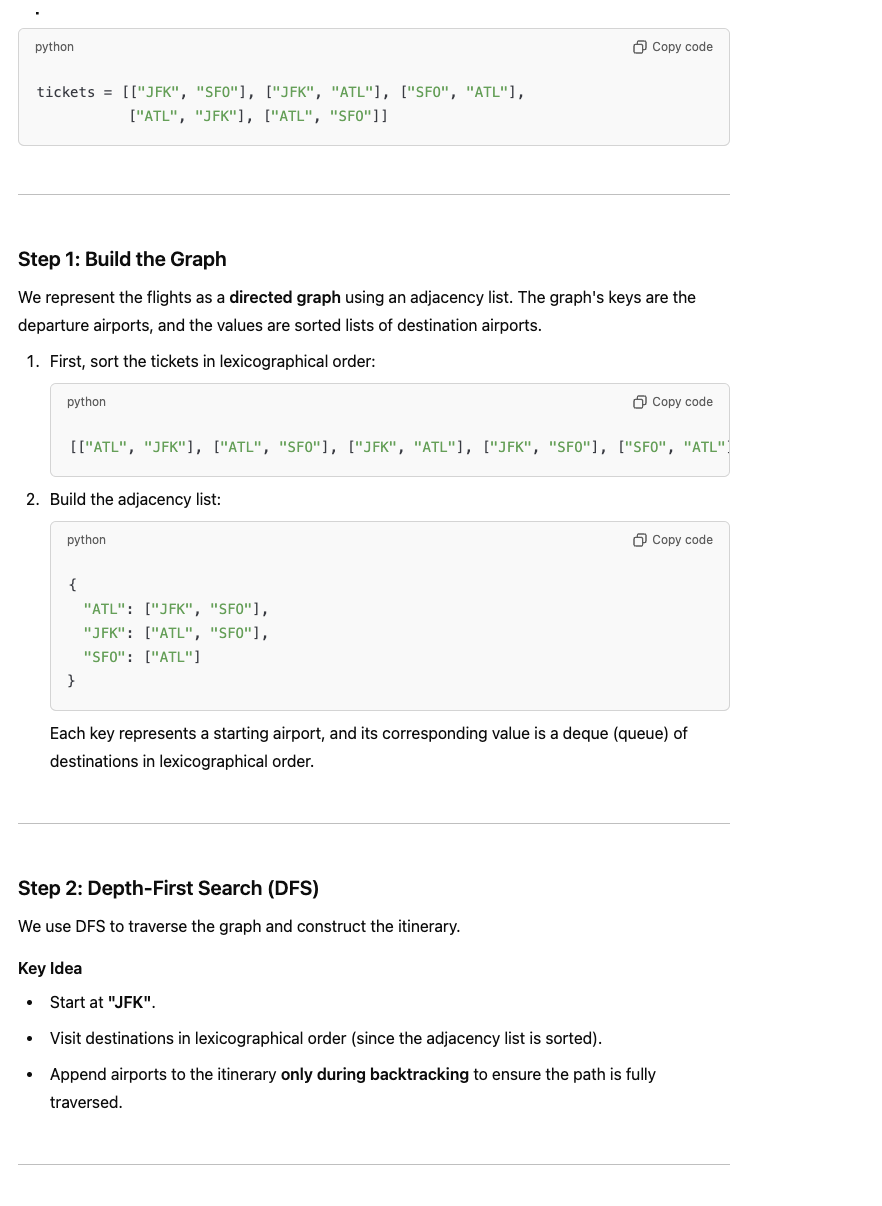

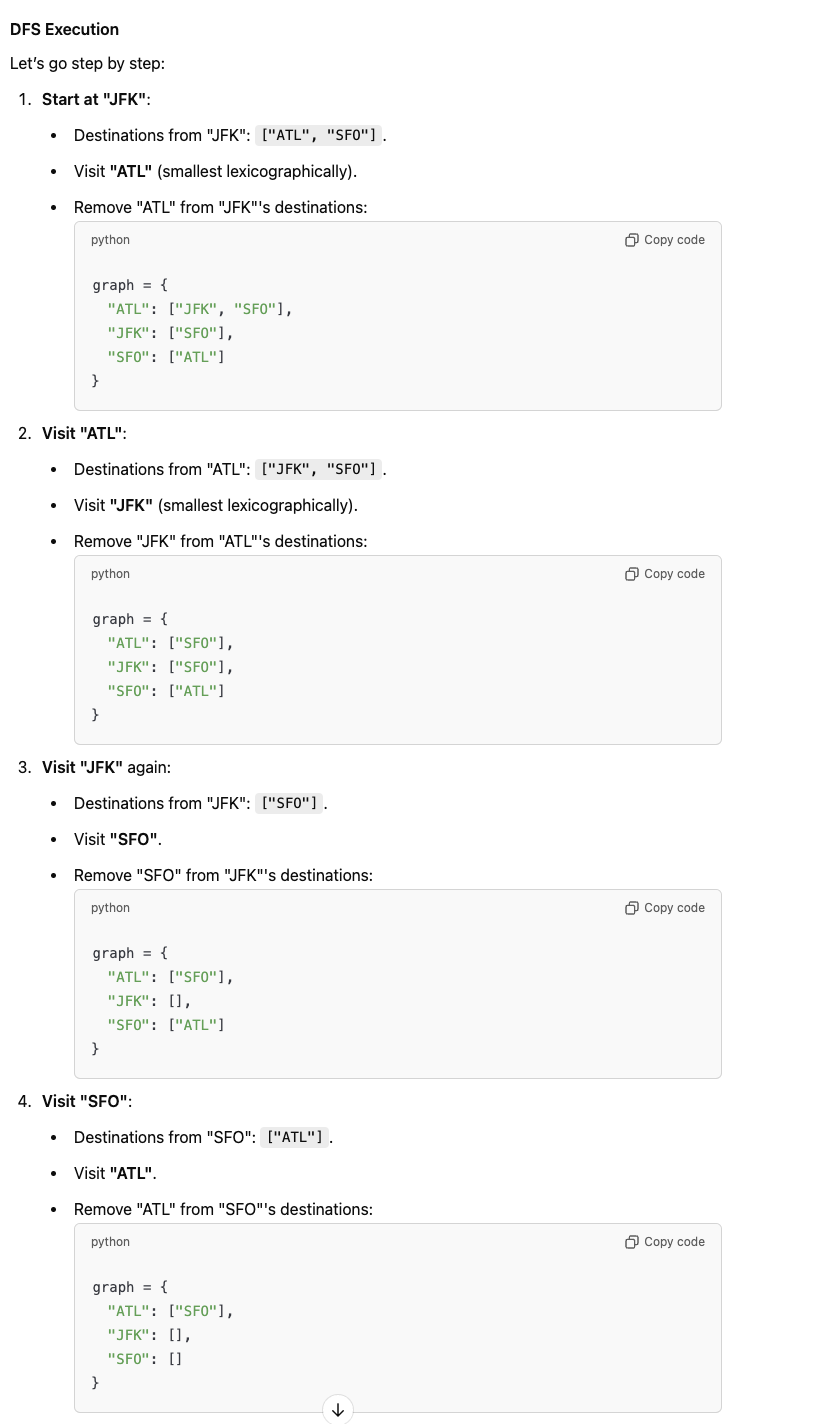

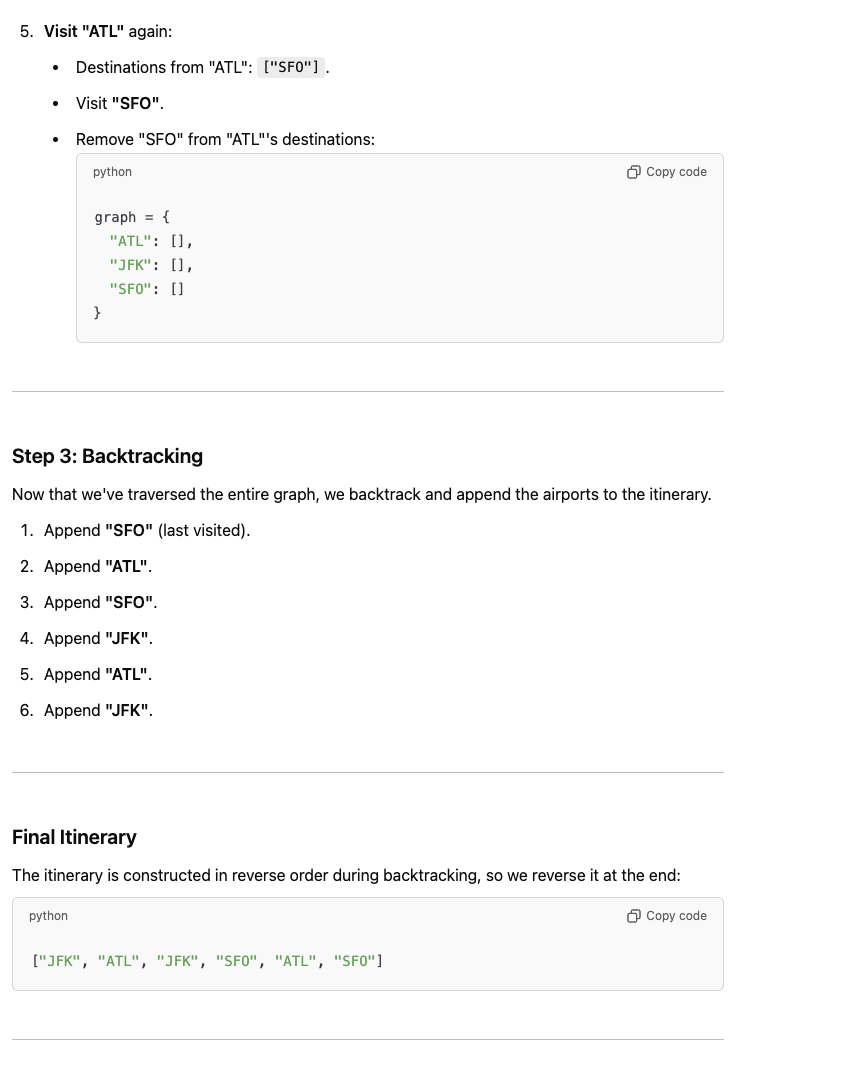

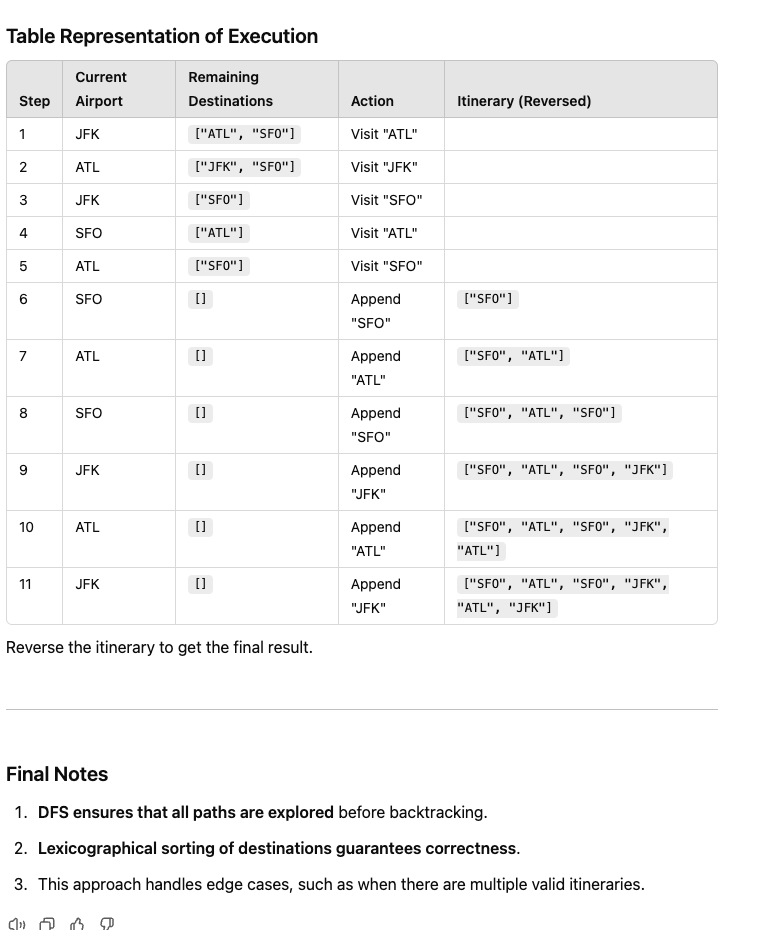

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************


************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************